For this particular assignment, the data of different types of wine sales in the
20th century is to be analysed. Both of these data are from the same company
but of different wines. As an analyst in the ABC Estate Wines, you are tasked to
analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv

In [1]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.18.5
Pandas version: 1.0.5
Seaborn version: 0.10.1
Matplotlib version: 3.2.2
Sklearn version: 0.24.2
Statsmodels version: 0.11.1


1. Read the data as an appropriate Time Series data and plot the data.

In [4]:
#Read the csv file
#dfsp=pd.read_csv('/kaggle/input/sparkling-wine-dataset/Sparkling.csv')
dfsp = pd.read_csv("Sparkling.csv")


In [6]:
#Display the first 5 Rows
dfsp.head()


,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [7]:
dfsp.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


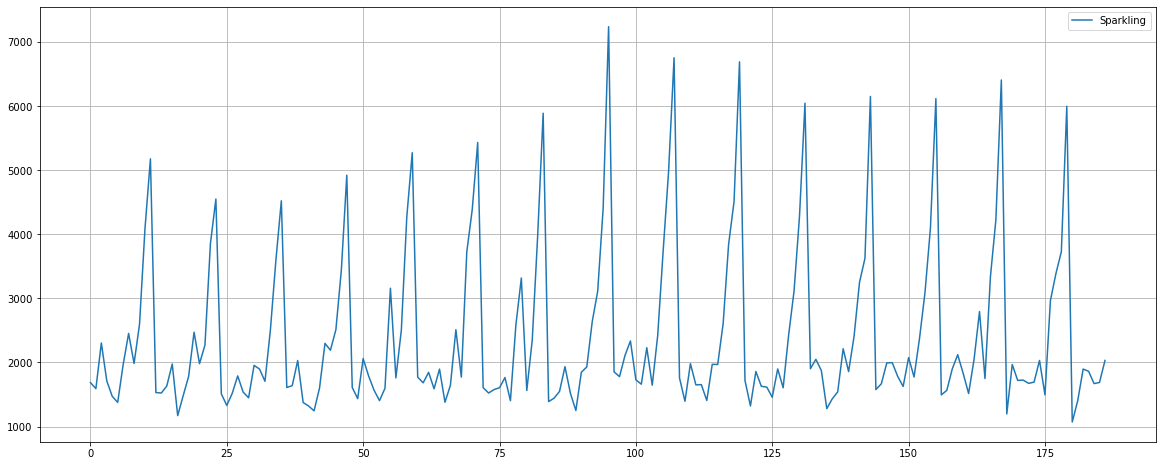

In [11]:
#plot the time series data
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
dfsp.plot();
plt.grid();


Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the XAxis as a Time Series, we need to pass the date range manually through a command in Pandas


In [10]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [12]:
date


DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [13]:
dfsp['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
dfsp.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [14]:
dfsp['Time_Stamp'] = pd.to_datetime(dfsp['Time_Stamp'])


In [15]:
dfsp = dfsp.set_index('Time_Stamp')
dfsp.drop(['YearMonth'], axis=1, inplace=True)
dfsp.head()


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


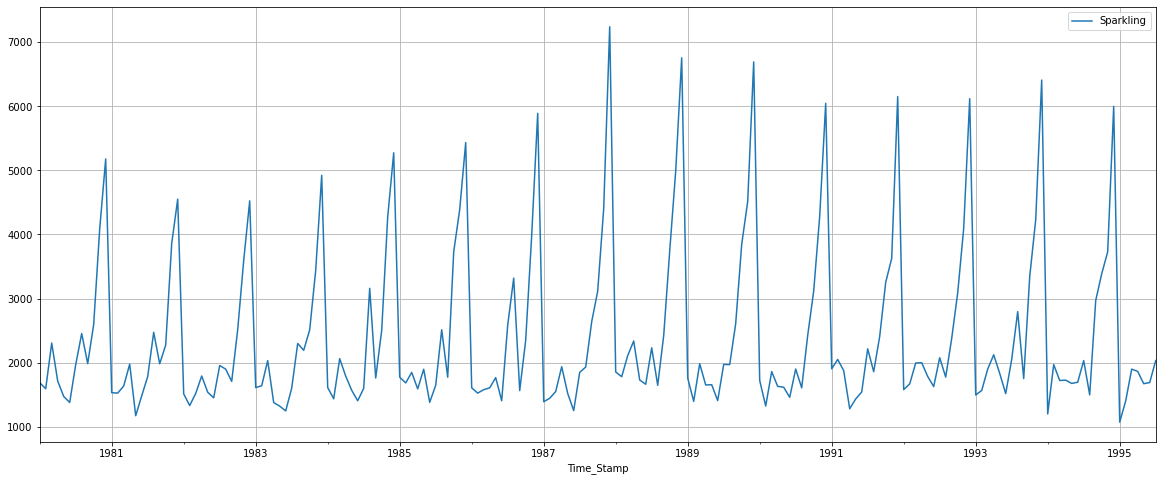

In [16]:
#plot the time series data
dfsp.plot();
plt.grid();


We can see that there is a no trend but there is a seasonal pattern is associated


2. Perform appropriate Exploratory Data Analysis to understand the data and
also perform decomposition.


In [18]:
print('****Show infomation of the test data****')
print('***********************************\n')
dfsp.info()


****Show infomation of the test data****
***********************************

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = dfsp.isnull().sum()[dfsp.isnull().sum()>0]
if msv.empty:
 print('There is no missing values in the data.') 
else:
 for i in range(msv.count()):
 print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv

In [20]:
dfsp.describe()


,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


Plot a boxplot to understand the spread of sales across different years and
within different months across years.

The basic measures of descriptive statistics tell us how the wine sales have varied across years. But remember,
for this measure of descriptive statistics we have averaged over the whole data without taking the time
component into account.


Yearly Boxplot


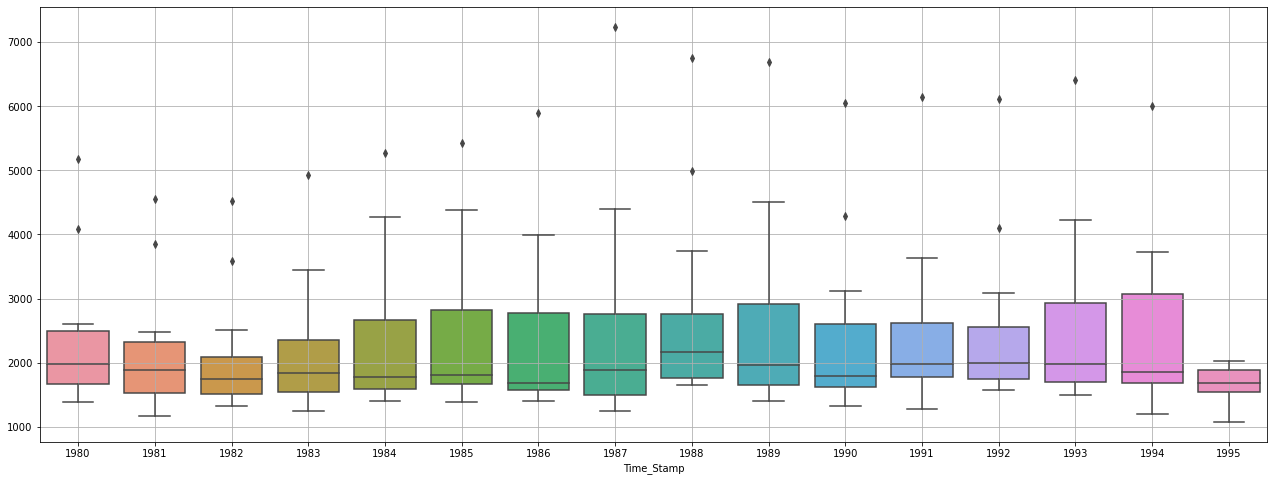

In [21]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = dfsp.index.year,y = dfsp.values[:,0],ax=ax)
plt.grid();


The yearly boxplots also shows that the there is no trend on the Sales


Monthly Boxplot


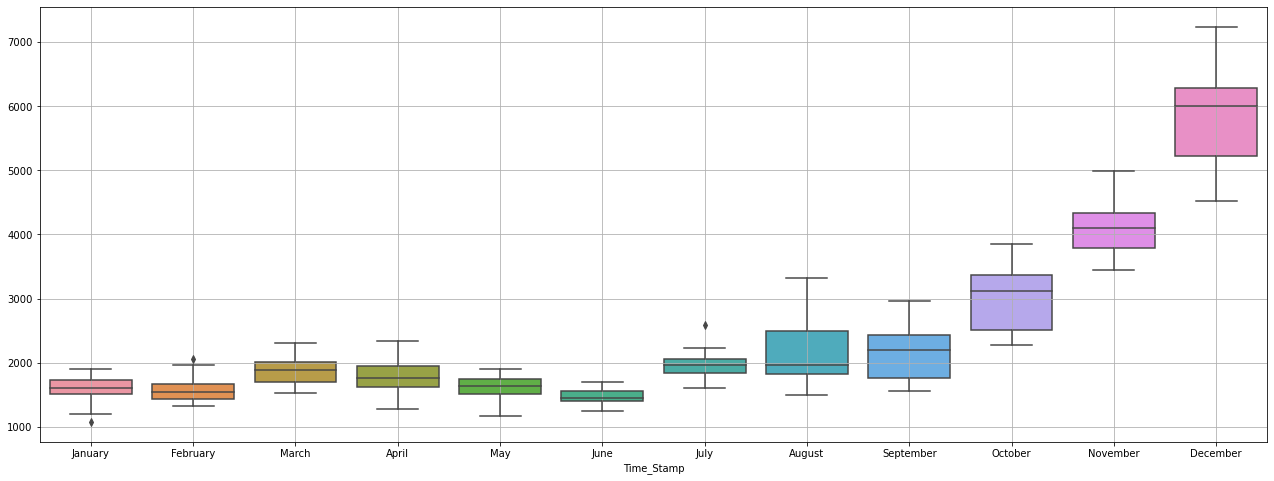

In [22]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = dfsp.index.month_name(),y = dfsp.values[:,0],ax=ax)
plt.grid();


There is a clear distinction of 'Sparkling’ Sales within different months spread across various years. The highest
such numbers are being recorded in the month of August-December across various years

Plot a time series monthplot to understand the spread of accidents across
different years and within different months across years.

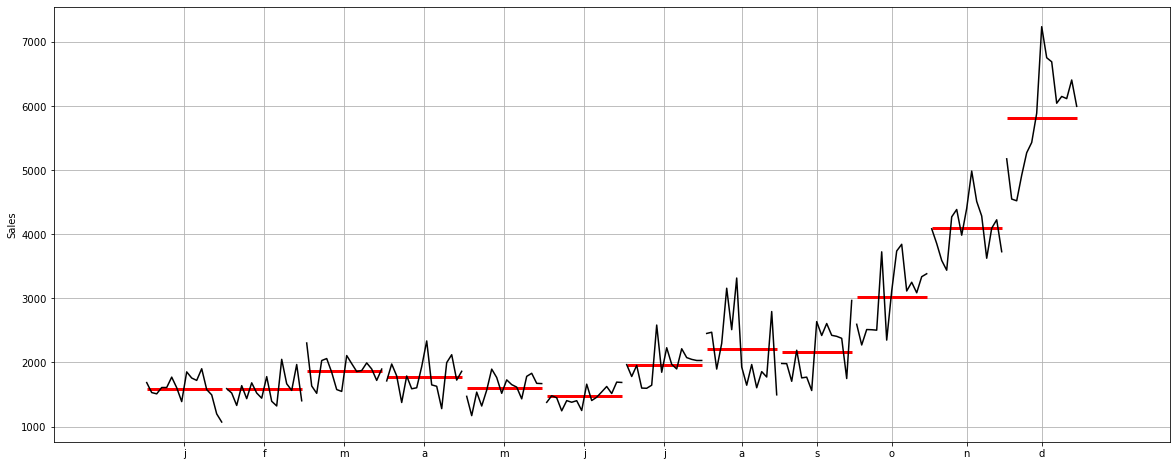

In [23]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(dfsp['Sparkling'],ylabel='Sales')
plt.grid();


This plot shows us the behaviour of the Time Series (sales of 'Sparkling' in this case) across various months.
The red line is the median value.

Plot a graph of monthly 'Sparkling' Sales across years.


monthly_sales_across_years = pd.pivot_table(dfsp, values = 'Sparkling', columns = df
monthly_sales_across_years


monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

Plot the Empirical Cumulative Distribution

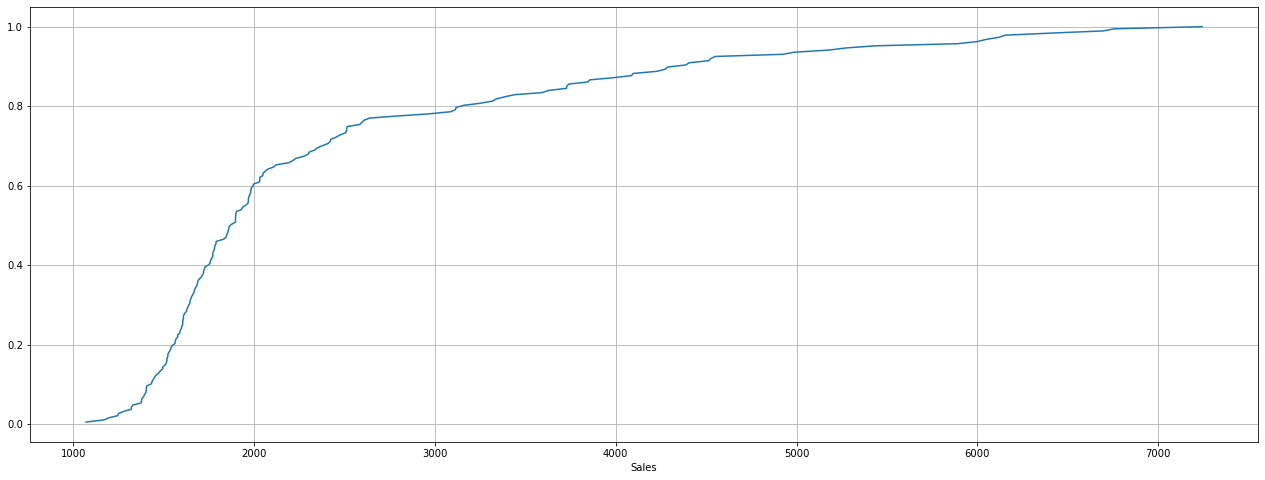

In [26]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (22, 8))
cdf = ECDF(dfsp['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');


This particular graph tells us what percentage of data points refer to what number of Sales

Plot the average sales of Sparkling wine per month and the month on month
percentage change of Sparkling Sales

# group by date and get average RetailSales, and precent change
average = dfsp.groupby(dfsp.index)["Sparkling"].mean()
pct_change = dfsp.groupby(dfsp.index)["Sparkling"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",g
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Spark

The above two graphs tells us the Average 'Sparkling' and the Percentage change of 'Sparkling' with respect
to the time.

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose


Additive Decomposition

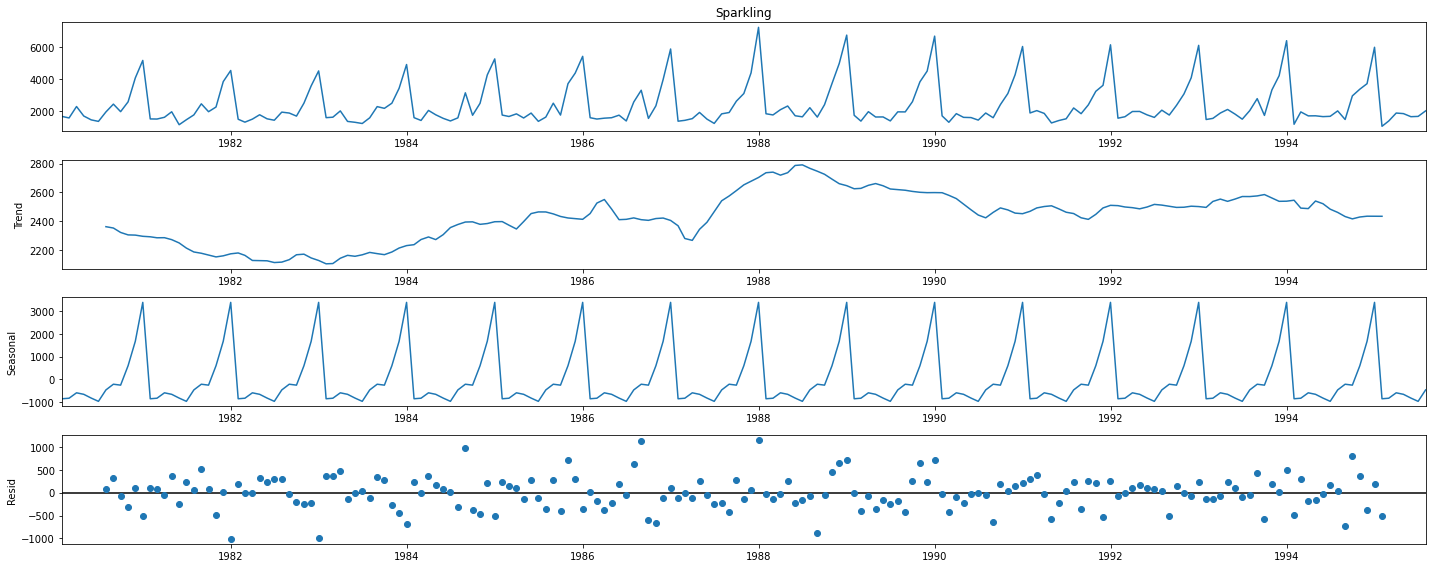

In [30]:
decomposition = seasonal_decompose(dfsp['Sparkling'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition

trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')


Multiplicative Decomposition

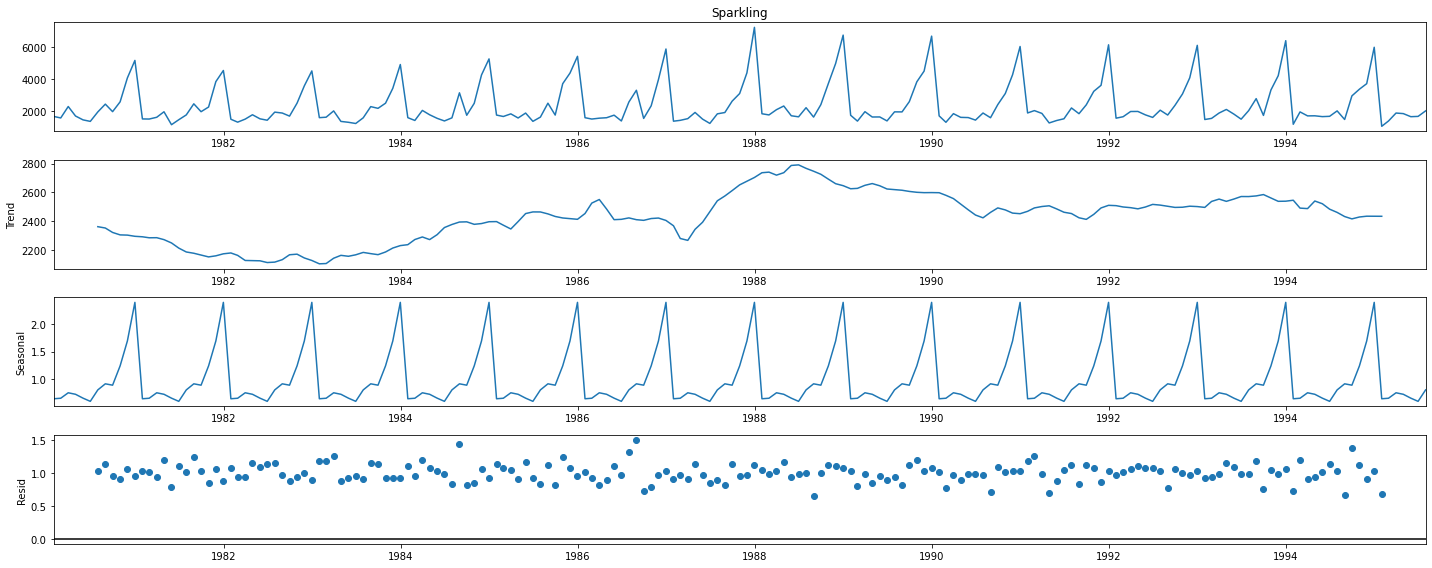

In [31]:
decomposition = seasonal_decompose(dfsp['Sparkling'],model='multiplicative')
decomposition.plot();


For the multiplicative series, we see that a lot of residuals are located around 1.


In [32]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')


Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

3. Split the data into training and test. The test data should start in
1991.
Split the data into train and test and plot the training and test data.
Training Data is till the end of 1991. Test Data is from the beginning of 1992 to the last time stamp
provided.

In [33]:
train=dfsp[dfsp.index.year < 1991]
test=dfsp[dfsp.index.year >= 1991]

In [34]:
## This is to display multiple data frames from one cell
from IPython.display import display


In [35]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())


First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [36]:
len(train)

132

In [37]:
len(test)

55

4. Build various exponential smoothing models on the training
data and evaluate the model using RMSE on the test data. Other
models such as regression,naïve forecast models, simple average
models etc. should also be built on the training data and check
the performance on the test data using RMSE.

Model 1: Linear Regression


For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the
occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [38]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [39]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [44]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to
build the model on the training data and test the model on the test data.


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

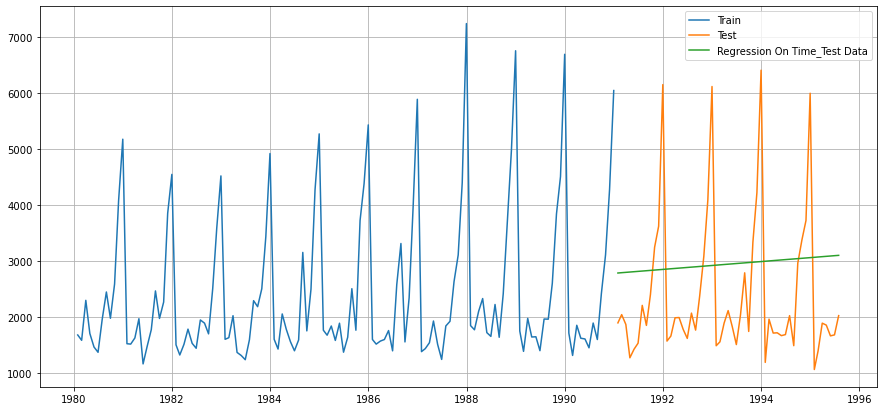

In [45]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(15,7))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();


Defining the accuracy metrics

In [46]:
from sklearn import metrics


Model Evaluation


## Train Data - MAPE & RMSE
import math
rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_
print(f"For RegressionOnTime forecast on the Train Data, RMSE is {rmse_model1_train


## Test Data - MAPE & RMSE
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_mod
print(f"For RegressionOnTime forecast on the Train Data, RMSE is {rmse_model1_test}


resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'
resultsDf

Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

For this particular naive model, we say that the prediction for tomorrow is the same as today and the
prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as
today,therefore the prediction for day after tomorrow is also today

In [47]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Spa
NaiveModel_train['naive'].head()


NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Spar
NaiveModel_test['naive'].head()


plt.figure(figsize=(22,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();


In [49]:
Model Evaluation


SyntaxError: invalid syntax (<ipython-input-49-f06eda0601d3>, line 1)

## Train Data - MAPE & RMSE
import math
rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['
print(f"For Naive forecast on the Train Data, RMSE is {rmse_model2_train}")


## Test Data - MAPE & RMSE
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['nai
print(f"For Naive forecast on the Train Data, RMSE is {rmse_model2_test}")


resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf.sort_values(by=['Test RMSE'])


Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values


In [50]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()


In [51]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()


,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


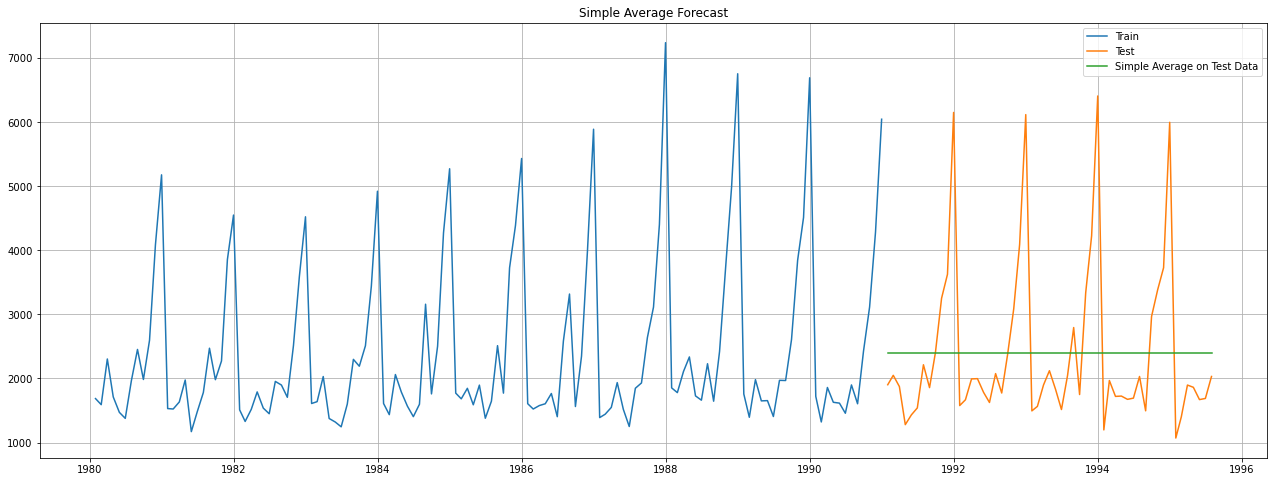

In [52]:
plt.figure(figsize=(22,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();


Model Evaluation


## Test Data - RMSE 
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['
print(f"For SimpleAverage forecast on the Train Data, RMSE is {rmse_model3_test}")


resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverage']
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf.sort_values(by=['Test RMSE'])


Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different
intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.


In [53]:
MovingAverage = dfsp.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [54]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage.head(10)


,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN
1980-06-30,1377,1424.0,1716.00,1690.166667,NaN
1980-07-31,1966,1671.5,1631.50,1736.833333,NaN
1980-08-31,2453,2209.5,1816.75,1880.500000,NaN
1980-09-30,1984,2218.5,1945.00,1827.166667,1838.222222


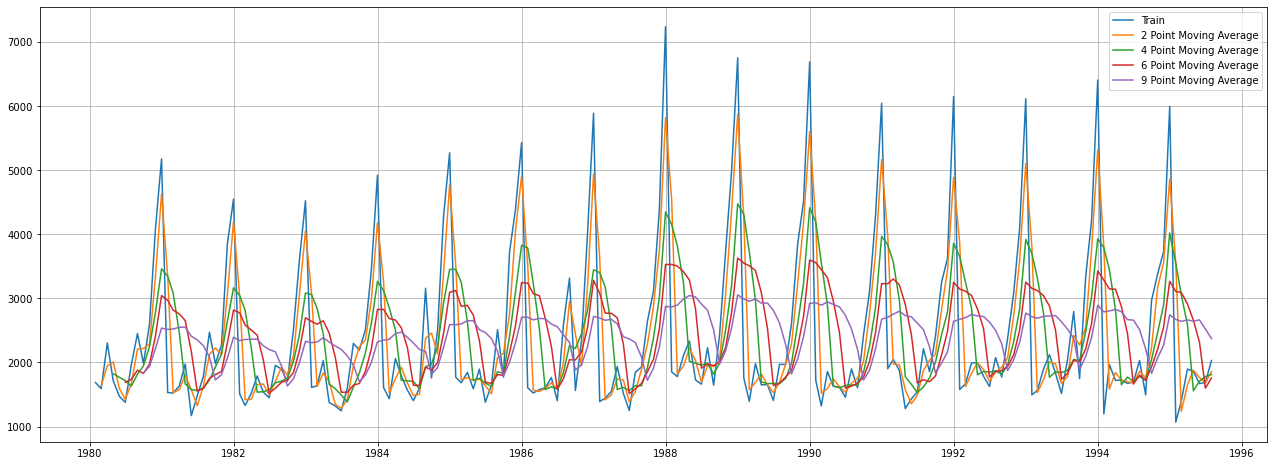

In [55]:
## Plotting on the whole data
plt.figure(figsize=(22,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();


Let us split the data into train and test and plot this Time Series. The window of the moving average is need to
be carefully selected as too big a window will result in not having any test set as the whole series might get
averaged over.


In [56]:
MovingAverage

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN
...,...,...,...,...,...
1995-03-31,1897,1649.5,2592.00,2913.666667,2664.000000
1995-04-30,1862,1879.5,1557.75,2659.833333,2645.222222
1995-05-31,1670,1766.0,1707.75,2316.666667,2664.666667


In [57]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

## Plotting on both the Training and Test data
plt.figure(figsize=(22,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving 
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving 
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving A
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving A
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving 
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving 
plt.legend(loc = 'best')
plt.grid();


Model Evaluation


Done only on the test data


## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAve
print(f"For 2 point Moving Average Model forecast on the Train Data, RMSE is {rmse_
## Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAve
print(f"For 4 point Moving Average Model forecast on the Train Data, RMSE is {rmse_
## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAve
print(f"For 6 point Moving Average Model forecast on the Train Data, RMSE is {rmse_
## Test Data - RMSE --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAve
print(f"For 9 point Moving Average Model forecast on the Train Data, RMSE is {rmse_

resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
 ,rmse_model4_test_6,rmse_model4_test_9]
 }
 ,index=['2pointTrailingMovingAverage','4pointTrailingMovi
 ,'6pointTrailingMovingAverage','9pointTrailingMov
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf.sort_values(by=['Test RMSE'])


Before we go on to build the various Exponential Smoothing models, let us plot
all the models and compare the Time Series plots.


## Plotting on both Training and Test data
plt.figure(figsize=(22,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving A
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();


Method 5: Simple Exponential Smoothing

In [59]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [60]:
SES_train = train.copy()
SES_test = test.copy()

In [61]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [62]:
model_SES_autofit = model_SES.fit(optimized=True)

In [63]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7901027902044,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2403.790103
1991-02-28,2049,2403.790103
1991-03-31,1874,2403.790103
1991-04-30,1279,2403.790103
1991-05-31,1432,2403.790103


## Plotting on both the Training and Test data
plt.figure(figsize=(22,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predi
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions');

Model Evaluation for $\alpha$ = 0.049 : Simple Exponential Smoothing


## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['pred
print(f'For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Dat


resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.049,S
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf.sort_values(by=['Test RMSE'])


Setting different alpha values.

Remember, the higher the alpha value more weightage is given to the more recent observation. That
means, what happened recently will happen again.


We will run a loop with different alpha values to understand which particular value works best for alpha
on the test set.


In [68]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6


,Alpha Values,Train RMSE,Test RMSE


for i in np.arange(0.1,1,0.1):
 model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=Tr
 SES_train['predict',i] = model_SES_alpha_i.fittedvalues
 SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
 
 rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_trai
 
 rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['
 resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_trai
 ,'Test RMSE':rmse_model5_test_i}, ignore_index
#SES_test.isnull().sum()


Model Evaluation


In [69]:
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [70]:
## Plotting on both the Training and Test data
plt.figure(figsize=(22,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predi
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing pr
plt.legend(loc='best')
plt.grid();


SyntaxError: EOL while scanning string literal (<ipython-input-70-5abe251a22b7>, line 5)

resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]

resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']
 ,index=['Alpha=0.1,SimpleExponentialSmoothing'])
#resultsDf_6_1 
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf.sort_values(by=['Test RMSE'])


Method 6: Double Exponential Smoothing (Holt's Model)


Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in
this model.

DES_train = train.copy()
DES_test = test.copy()


DES_train = train.copy()
DES_test = test.copy()


model_DES_autofit = model_DES.fit()


model_DES_autofit.params

DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test['predict'].head()


## Test Data
rmse_model_des_autofit = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['
print(f'For Alpha = 0.688 and Beta = 9.999999999999999e-05 Double Exponential Smooth


resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model_des_autofit]},index=['Alpha =
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf.sort_values(by=['Test RMSE'])


## First we will define an empty dataframe to store our values from the loop
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test
resultsDf_7

## First we will define an empty dataframe to store our values from the loop
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test
resultsDf_7

resultsDf_7

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.


resultsDf_7.sort_values(by=['Test RMSE']).head()


## Plotting on both the Training and Test data
plt.figure(figsize=(22,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict'], label='Alpha = 0.688 and Beta = 9.999999999999999e-05,
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialS
plt.legend(loc='best')
plt.grid();


resultsDf_7_2 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']
 ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_2])
resultsDf.sort_values(by=['Test RMSE'])


Method 7: Triple Exponential Smoothing (Holt - Winter's
Model)


TES_train = train.copy()
TES_test = test.copy()


model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='m

model_TES_autofit = model_TES.fit()


model_TES_autofit.params


## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()


## Plotting on both the Training and Test using autofit
plt.figure(figsize=(22,8))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,TripleE
plt.legend(loc='best')
plt.grid();


## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto
print("For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model fo


resultsDf_8_1 = pd.DataFrame({'Test RMSE': rmse_model6_test_1}
 ,index=['Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Expon
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf.sort_values(by=['Test RMSE'])


## First we will define an empty dataframe to store our values from the loop
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'
resultsDf_8_2


for i in np.arange(0.1,1.1,0.1):
 for j in np.arange(0.1,1.1,0.1):
 for k in np.arange(0.1,1.1,0.1):
 model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=
 TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
 TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
 
 rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TE
 
 rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_
 
 resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'
 'Train RMSE':rmse_model8_train,'Te
 , ignore_index=True)


resultsDf_8_2.sort_values(by=['Test RMSE']).head()


## Plotting on both the Training and Test data using brute force alpha, beta and gam
plt.figure(figsize=(22,8))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,TripleE
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=4.0,Beta=0.1,Gamma=0.2,Tri
plt.legend(loc='best')
plt.grid();


resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE
 ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSm
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf.sort_values(by=['Test RMSE'])


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to
work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However,
since this was a model building exercise we had gone on to build different models on the data and have
compared these model with the best RMSE value on the test data.


We see that the best model is the Triple Exponential Smoothing with
multiplicative seasonality with the parameters $\alpha$ = 0.4, $\beta$ = 0.1 and
$\gamma$ = 0.2.

## Plotting on both the Training and Test data
plt.figure(figsize=(22,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing pr
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialS
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=1.0,Beta=0.1,Gamma=0.4,Tri
plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');


In this particular we have built several models and went through a model building exercise. This particular
exercise has given us an idea as to which particular model gives us the least error on our test set for this data.
But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we
need to build the model on the whole data. Remember, the training data that we have used to build the model
stops much before the data ends. In order to forecast using any of the models built, we need to build the
models again (this time on the complete data) with the same parameters.


5. Check for the stationarity of the data on which the model is being built on
using appropriate statistical tests and also mention the hypothesis for the
statistical test. If the data is found to be non-stationary, take appropriate steps to
make it stationary. Check the new data for stationarity and comment. Note:
Stationarity should be checked at alpha = 0.05.

Check for stationarity of the whole Time Series data

## Test for stationarity of the series - Dicky Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
 
 #Determing rolling statistics
 rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
 rolstd = timeseries.rolling(window=7).std() #determining the rolling standard 
 #Plot rolling statistics:
 orig = plt.plot(timeseries, color='blue',label='Original')
 mean = plt.plot(rolmean, color='red', label='Rolling Mean')
 std = plt.plot(rolstd, color='black', label = 'Rolling Std')
 plt.legend(loc='best')
 plt.title('Rolling Mean & Standard Deviation')
 plt.show(block=False)
 
 #Perform Dickey-Fuller test:
 print ('Results of Dickey-Fuller Test:')
 dftest = adfuller(timeseries, autolag='AIC')
 dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used'
 for key,value in dftest[4].items():
 dfoutput['Critical Value (%s)'%key] = value
 print (dfoutput,'\n')


test_stationarity(dfsp['Sparkling'])


We see that at 5% significant level the Time Series is non-stationary.


Let us take a difference of order 1 and check whether the Time Series is stationary or not.


test_stationarity(dfsp['Sparkling'].diff().dropna())

Plot the Autocorrelation and the Partial Autocorrelation function
plots on the whole data.

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(dfsp['Sparkling'],lags=50)
plot_acf(dfsp['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorre
plt.show()


On the first order difference we got the q value as 2 we will be using this value on the optimum model build

plot_pacf(dfsp['Sparkling'],lags=50,method='ywmle')
plot_pacf(dfsp['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial 
plt.show()


From the above plots, we can say that there seems to be a seasonality in the data.
On the first order difference we got the p value as 3 we will be using this value on the optimum model build

6. Build an automated version of the ARIMA/SARIMA model in which the
parameters are selected using the lowest Akaike Information Criteria (AIC) on
the training data and evaluate this model on the test data using RMSE.

Check for stationarity of the Training Data Time Series.

test_stationarity(train['Sparkling'])


We see that the series is not stationary at 𝛼 = 0.05.


test_stationarity(train['Sparkling'].diff(1).dropna())

In [85]:
train.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [86]:
## The following loop helps us in getting a combination of different parameters of p
## We have kept the value of d as 1 as we need to take a difference of the series to
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
 print('Model: {}'.format(pdq[i]))


Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [87]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC


,param,AIC


from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
 ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
 print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
 ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_ind

In [88]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()


,param,AIC


auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())


Predict on the Test Set using this model and evaluate the
model.


predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))


from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)


resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
 ,index=['ARIMA(2,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf.sort_values(by=['Test RMSE'])


Build an Automated version of a SARIMA model for which the best
parameters are selected in accordance with the lowest Akaike
Information Criteria (AIC).


plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorr
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting
seasonality both as 6 and 12.


Setting the seasonality as 6 for the first iteration of the auto SARIMA
model.

In [93]:
import itertools
p = q = range(0, 3)
P=Q=range(0,3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
 print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


import statsmodels.api as sm
for param in pdq:
 for param_seasonal in model_pdq:
 SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
 order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility=False)
 
 results_SARIMA = SARIMA_model.fit(maxiter=1000)
 
 
 
 predicted_auto_ARIMA = results_SARIMA.get_forecast(steps=len(test))
 rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA.predicted_m
 
 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.ai
 SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AI


In [94]:
SARIMA_AIC.sort_values(by=['AIC']).head()


NameError: name 'SARIMA_AIC' is not defined

In [95]:
import statsmodels.api as sm
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
 order=(1, 1, 2),
 seasonal_order=(2, 0,2, 6),
 enforce_stationarity=False,
enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.755
Date:                           Wed, 28 Jul 2021   AIC                           1727.510
Time:                                   20:22:02   BIC                           1749.539
Sample:                                        0   HQIC                          1736.453
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6456      0.287     -2.250      0.024      -1.208      -0.083
ma.L1         -0.1063      0.251     -0.423

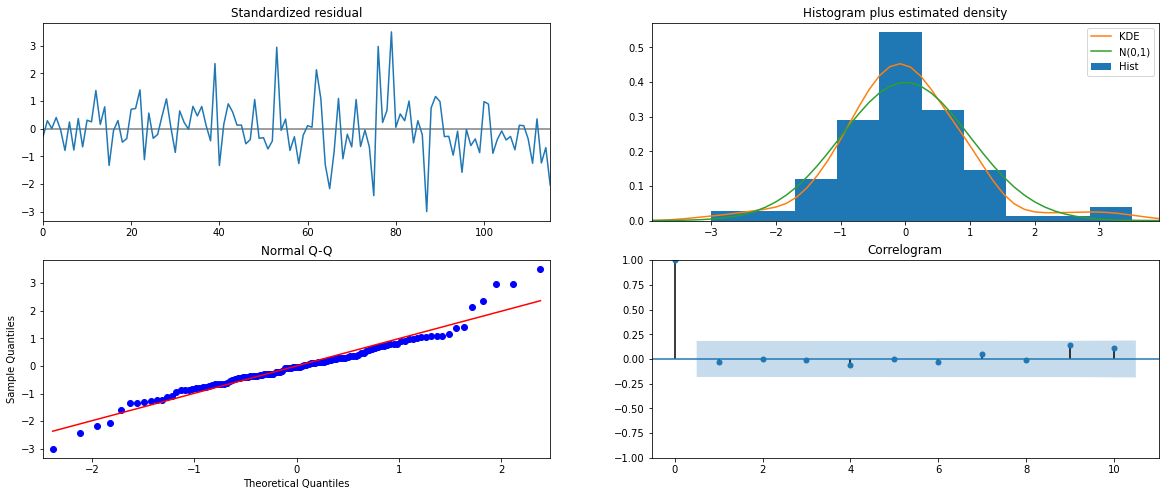

In [96]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()


In [98]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [99]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()


y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1329.911653,380.496817,584.151597,2075.671710
1,1177.176496,392.034687,408.802629,1945.550363
2,1624.610769,392.231202,855.851739,2393.369798
3,1544.422912,397.638747,765.065288,2323.780535
4,1306.364155,398.860250,524.612430,2088.115880


rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,s
print(rmse)


temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
 ,index=['SARIMA(1,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf.sort_values(by=['Test RMSE'])


In [100]:
import itertools
p = q = range(0, 3)
P=Q=range(0,3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
 print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [101]:
SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_12


,param,seasonal,AIC


import statsmodels.api as sm
for param in pdq:
 for param_seasonal in model_pdq:
 SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
 order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility=False)
 
 results_SARIMA = SARIMA_model.fit(maxiter=1000)
 predicted_auto_ARIMA = results_SARIMA.get_forecast(steps=len(test))
 rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA.predicted_m
 
 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.ai
 SARIMA_AIC_12 = SARIMA_AIC_12.append({'param':param,'seasonal':param_seasona


In [102]:
SARIMA_AIC_12.sort_values(by=['AIC']).head()

,param,seasonal,AIC


In [103]:
import statsmodels.api as sm
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
 order=(1, 1, 2),
 seasonal_order=(1, 0, 2, 12),
 enforce_stationarity=False,
enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Wed, 28 Jul 2021   AIC                           1555.584
Time:                                    20:24:40   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.462      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

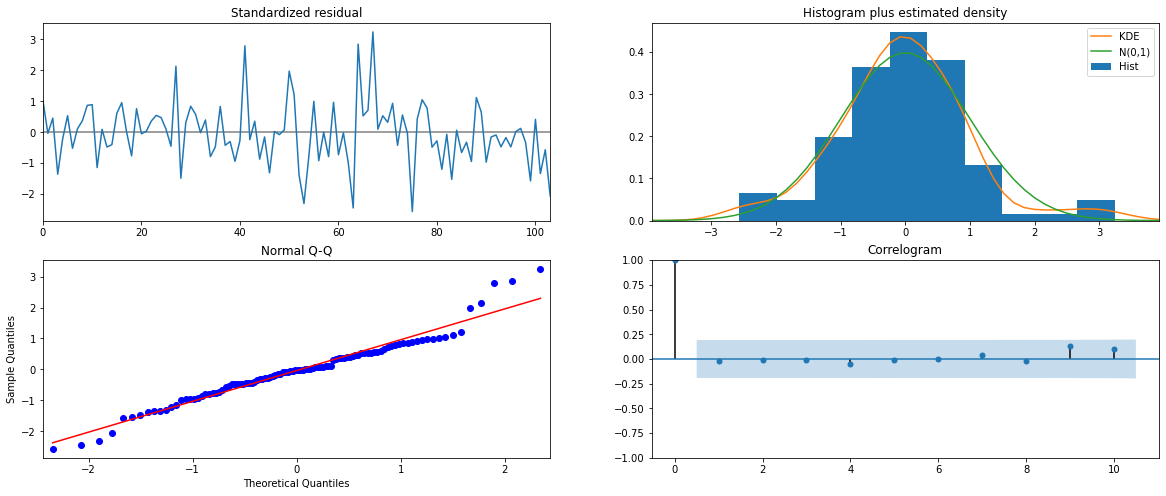

In [104]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()


In [105]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))


predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,
print(rmse)


temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
 ,index=['SARIMA(1,1,2)(1,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf.sort_values(by=['Test RMSE'])


7. Build ARIMA/SARIMA models based on the cut-off points of
ACF and PACF on the training data and evaluate this model on the
test data using RMSE

plot_acf(dfsp['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorre
plot_pacf(dfsp['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial 
plt.show();


manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())


Predict on the Test Set using this model and evaluate the
model.

predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))


rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)


temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
 ,index=['ARIMA(3,1,2)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf.sort_values(by=['Test RMSE'])


plot_acf(dfsp['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorre
plot_pacf(dfsp['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial A
plt.show()


dfsp.diff().dropna().plot()
plt.grid();


dfsp.diff().dropna().plot()
plt.grid();


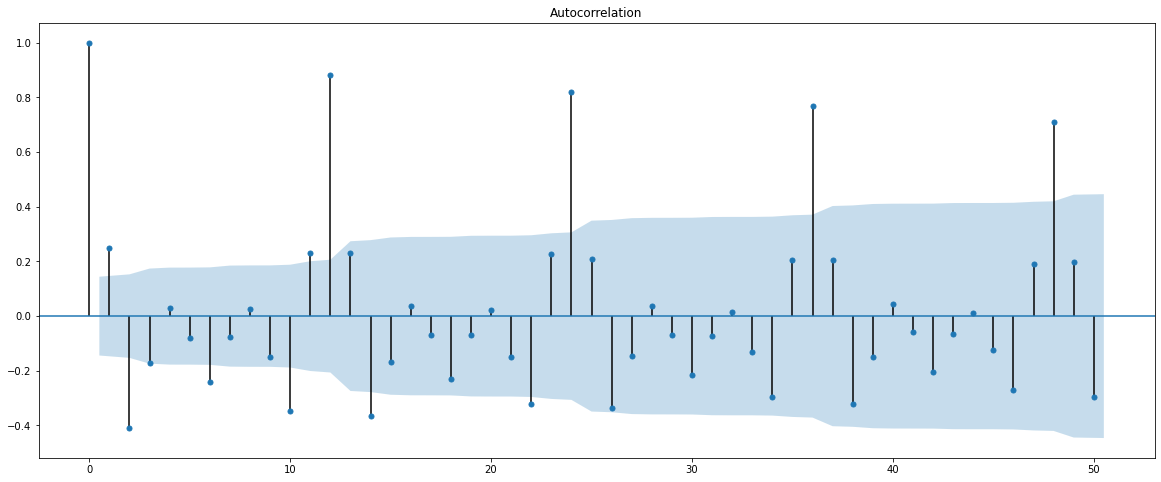

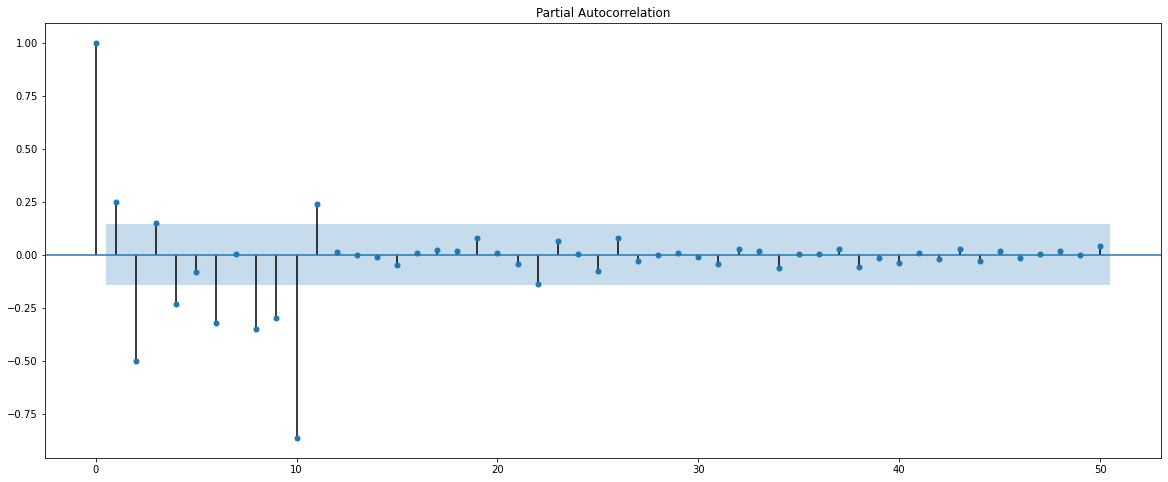

In [117]:
plot_acf((dfsp['Sparkling'].diff(2).dropna()),lags=50)
plot_pacf((dfsp['Sparkling'].diff(2).dropna()),lags=50,method='ywmle');


In [119]:
import statsmodels.api as sm
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
 order=(1, 1, 2),
 seasonal_order=(0,1,1,12),
 enforce_stationarity=False,
enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))
#rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mea
#print(rmse)


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -772.479
Date:                              Wed, 28 Jul 2021   AIC                           1554.958
Time:                                      20:28:12   BIC                           1568.180
Sample:                                           0   HQIC                          1560.315
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5529      0.270     -2.049      0.040      -1.082      -0.024
ma.L1         -0.15

results_manual_SARIMA_6.plot_diagnostics()
plt.show()


Predict on the Test Set using this model and evaluate the
model.


In [121]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [124]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1439.695480,406.221392,643.516182,2235.874778
1,1334.279604,422.749650,505.705517,2162.853692
2,1705.762328,422.751496,877.184622,2534.340034
3,1603.971245,427.592209,765.905914,2442.036575
4,1476.596428,428.507671,636.736825,2316.456031


rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean
print(rmse)


temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
 ,index=['SARIMA(1,1,2)(0,1,1,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])


8. Build a table (create a data frame) with all the models built along with their
corresponding parameters and the respective RMSE values on the test
data

resultsDf.sort_values(by=['Test RMSE'],ascending=True)


9. Based on the model-building exercise, build the most optimum
model(s) on the complete data and predict 12 months into the
future with appropriate confidence intervals/bands.

In [126]:
full_data_model = sm.tsa.statespace.SARIMAX(dfsp['Sparkling'],
 order=(1,1,2),
 seasonal_order=(0, 1, 1, 12),
 enforce_stationarity=False,
enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1173.517
Date:                              Wed, 28 Jul 2021   AIC                           2357.034
Time:                                      20:30:01   BIC                           2372.379
Sample:                                  01-31-1980   HQIC                          2363.265
                                       - 07-31-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4369      0.439     -0.995      0.320      -1.298       0.424
ma.L1         -0.48

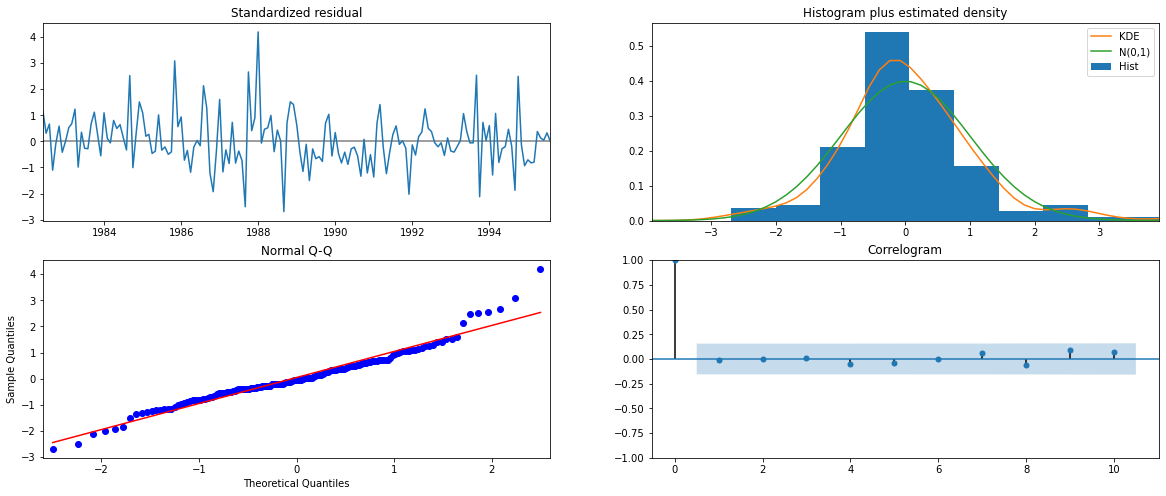

In [127]:
results_full_data_model.plot_diagnostics();

Evaluate the model on the whole and predict 12 months into the
future (till the end of next year).


predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=17)


predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()


predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()


pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alp

# plot the forecast along with the confidence band
axis = dfsp['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['
 pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.1
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()


fullmodel1 = ExponentialSmoothing(dfsp['Sparkling'],
 trend='additive',
seasonal='multiplicative').fit(smoothing_level=0.4
 smoothing_trend=0.1
smoothing_seasonal=

RMSE_fullmodel1 = metrics.mean_squared_error(dfsp['Sparkling'],fullmodel1.fittedvalu
print('RMSE:',RMSE_fullmodel1)


Evaluate the model on the whole and predict 12 months into the
future (till the end of next year).


prediction_1 = fullmodel1.forecast(steps=17)

prediction_1 = fullmodel1.forecast(steps=17)

#In the below code, we have calculated the upper and lower confidence bands at 95% c
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 9
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddo
 'prediction':prediction_1,
'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,dd
pred_1_df.head()


# plot the forecast along with the confidence band
axis = dfsp.plot(label='Actual', figsize=(22,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], col
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()